<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Module 3: </span>Classification Models</h1>
<hr>

### In this module we will:
<br><hr id="toc">
1. [Import the train and test sets we saved in Module2](#import)
2. [Build our model pipelines and tune hyperparameters](#pipelines)
3. [Explore Model Stacking](#stacker)
4. [Select winning model](#best model)
5. [Save Model for Future Use](#save model)

In [66]:
# Data Manipulation
import numpy as np
import pandas as pd

#Data Visualization
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

#Feature selection/transformation, Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import PowerTransformer, minmax_scale
from sklearn.feature_selection import SelectFromModel

#classification models to be used
from sklearn import svm
#from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection

# cross-validaion, hyperparameter tuning, classification performance
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
# Pickle for saving model files
import pickle
import warnings
warnings.filterwarnings('ignore')

<br id="import">
## Import Data Sets From Module2
<hr>

In [2]:
X_train = pd.read_csv('X_train.csv')
X_train.head()

,Date,PctRng5,PV2,PctD1,CumRet,TotVR,PctRng100,PctOHL,VS2,PV13,...,PV2_bcox,PctD1_bcox,CumRet_bcox,TotVR_bcox,PctRng100_bcox,PctOHL_bcox,VS2_bcox,PV13_bcox,VR1_bcox,Lrd_DV_bcox
0,2004-03-31,0.566845,0.012197,0.475936,-0.003963,1.201205,1.218531,0.009434,0.349497,0.096541,...,0.019019,0.458133,0.357280,0.176496,0.069945,0.009287,0.251720,0.052710,0.044377,0.038029
1,2004-04-06,0.513514,0.095890,0.130631,0.000789,0.904435,1.278744,0.149123,0.443065,0.008476,...,0.110280,0.375328,0.358934,0.142481,0.072130,0.118617,0.296856,0.008642,0.077064,0.037723
2,2004-04-07,0.412429,0.020684,0.129944,0.002133,0.659084,0.811833,0.589041,0.147982,0.202630,...,0.031212,0.375164,0.359401,0.110331,0.050319,0.282482,0.126710,0.064832,0.091807,0.038433
3,2004-04-21,0.425856,0.032548,-0.311787,0.018749,1.225677,1.179071,0.455357,0.064760,0.044511,...,0.046921,0.269841,0.365164,0.179091,0.068428,0.249544,0.059766,0.034309,0.138044,0.040936
4,2004-04-22,0.418033,0.093742,-0.159836,0.013601,1.142937,1.068175,0.647059,0.444562,0.013363,...,0.108585,0.305992,0.363381,0.170195,0.063769,0.294090,0.297526,0.013090,0.045150,0.039036


In [3]:
X_test = pd.read_csv('X_test.csv')
X_test.head()

,Date,PctRng5,PV2,PctD1,CumRet,TotVR,PctRng100,PctOHL,VS2,PV13,...,PV2_bcox,PctD1_bcox,CumRet_bcox,TotVR_bcox,PctRng100_bcox,PctOHL_bcox,VS2_bcox,PV13_bcox,VR1_bcox,Lrd_DV_bcox
0,2014-01-02,0.625000,0.082411,-0.275000,0.084319,0.720529,0.876885,0.346667,0.131323,0.032846,...,0.099189,0.278585,0.387653,0.118763,0.054135,0.214234,0.114174,0.027609,0.118780,0.038632
1,2014-01-02,0.841667,0.029757,-0.058333,0.091375,0.827267,1.180872,0.257426,0.264228,0.035270,...,0.043358,0.330187,0.390049,0.132795,0.068499,0.177222,0.204157,0.029108,0.042552,0.038988
2,2014-01-03,0.950000,0.208139,0.458333,0.088207,1.483945,1.328981,0.192982,0.364446,0.017262,...,0.171607,0.453903,0.388974,0.204751,0.073840,0.144501,0.259388,0.016385,0.100695,0.035785
3,2014-01-07,0.440000,0.015391,0.234286,0.084271,1.282796,0.902379,0.064935,0.449544,0.015324,...,0.023707,0.400143,0.387636,0.185032,0.055550,0.058493,0.299745,0.014774,0.024878,0.037934
4,2014-01-10,0.905109,0.058915,0.635036,0.079087,1.992749,1.478479,0.137097,0.089753,0.049972,...,0.077013,0.496419,0.385873,0.247417,0.078382,0.110928,0.081051,0.037033,0.094066,0.040996


In [4]:
y_train = pd.read_csv('Y_train.csv', header=None)
y_train.head()

,0
0,1
1,1
2,1
3,0
4,0


In [5]:
y_test = pd.read_csv('Y_test.csv', header=None)
y_test.head()

,0
0,1
1,0
2,0
3,0
4,1


In [6]:
#Extract only transformed features
bcox_cols = X_train.columns[X_train.columns.str.contains(pat='_bcox')]
X_train_bcox = X_train[bcox_cols]
X_test_bcox = X_test[bcox_cols]

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">
<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>

<br id="pipelines">
## Build Model Pipelines
<hr>

In [7]:
# Pipeline dictionary
# This time we'll add an SVM and KNN classifiers
pipeline_dict = {'l1': make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', random_state=123)), 
                                     'l2': make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=123)),
                                     'rf': make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123)),
                                     'gb': make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123)),
                                    'svm':make_pipeline(StandardScaler(), svm.SVC(random_state=123)),
                                     'knn':make_pipeline(StandardScaler(), KNeighborsClassifier())
                }

In [8]:
# Logistic Regression hyperparameters
l1_hyperparameters = { 'logisticregression__C': [0.001,0.01,0.1]}
l2_hyperparameters = { 'logisticregression__C': [0.001,0.01,0.1]}

In [9]:
# Random Forest hyperparameters
rf_hyperparameters = { 'randomforestclassifier__n_estimators': [100, 200],
                         'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33]}

In [10]:
gb_hyperparameters = {'gradientboostingclassifier__n_estimators': [100, 200], 
                    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2], 
                     'gradientboostingclassifier__max_depth': [1, 3, 5]}

In [11]:
#memory intensive, we'll only test k=1000
knn_hyperparameters = { 'kneighborsclassifier__n_neighbors': [1000]}

In [12]:
svm_hyperparameters = { 'svc__C': [0.01, 0.1],
                        'svc__gamma': [ 0.01, 0.1]}

In [13]:
# Create hyperparameters dictionary
hp_dict = { 'l1': l1_hyperparameters, 'l2' : l2_hyperparameters, 'rf': rf_hyperparameters, 'gb': gb_hyperparameters,
           'svm': svm_hyperparameters,'knn' : knn_hyperparameters}

In [14]:
#TAKES 15-20 min on 8 core 16G memory machine

# Create empty dictionary called fitted_models
fitted_models_bcox = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipeline_dict.items(): 
    # Create cross-validation object from pipeline and hyperparameters
    model_bcox = GridSearchCV(pipeline, hp_dict[name], cv=5, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model_bcox.fit(X_train_bcox, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models_bcox[name] = model_bcox
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted')

l1 has been fitted
l2 has been fitted
rf has been fitted
gb has been fitted
svm has been fitted
knn has been fitted


In [15]:
# Display best_score_ for each fitted model
for name, model in fitted_models_bcox.items():
    print(name, model.best_score_)

l1 0.547133741507143
l2 0.5477279185719084
rf 0.5334418352321165
gb 0.5472887442196905
svm 0.5488387713451652
knn 0.5464103955152548


<hr style="border-color:royalblue;background-color:royalblue;height:1px;">
<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>

<br id="stacker">
## Explore model predictions correlation and potential for model stacking
<hr>

In [19]:
l1_pred = fitted_models_bcox['l1'].predict(X_train_bcox)
l2_pred = fitted_models_bcox['l2'].predict(X_train_bcox)
rf_pred = fitted_models_bcox['rf'].predict(X_train_bcox)
gb_pred = fitted_models_bcox['gb'].predict(X_train_bcox)
svm_pred = fitted_models_bcox['svm'].predict(X_train_bcox)
knn_pred = fitted_models_bcox['knn'].predict(X_train_bcox)

In [20]:
classifiers = ['l1','l2','rf','gb','svm','knn']
classifier_preds = pd.DataFrame({'l1' : l1_pred, 'l2' : l2_pred, 'rf' : rf_pred, 'gb' : gb_pred,
                                'svm' : svm_pred, 'knn' : knn_pred})
classifier_preds.head()

,gb,knn,l1,l2,rf,svm
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


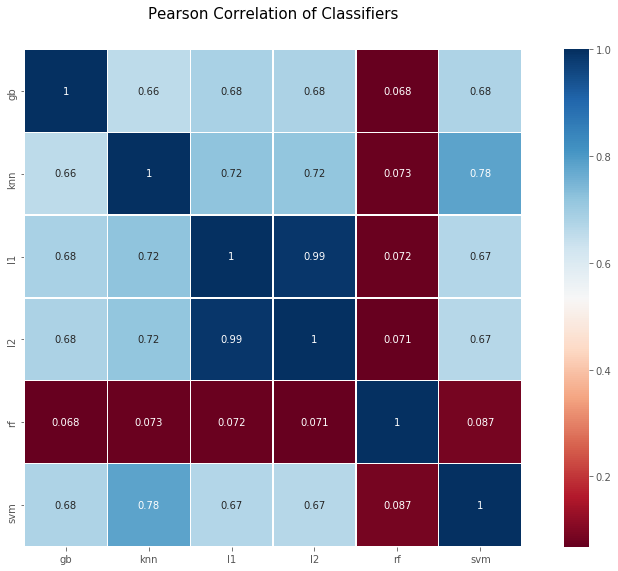

In [21]:
colormap = plt.cm.RdBu
plt.figure(figsize=(12,8))
plt.title('Pearson Correlation of Classifiers', y=1.05, size=15)
sns.heatmap(classifier_preds.astype(float).corr(),linewidths=0.1,vmax=1.0, 
        square=True, cmap=colormap, linecolor='white', annot=True)
plt.tight_layout();

### Predictions are correlated as expected but there is enough diversity to explore model stacking

In [23]:
# Display best_params_ for each fitted model
for name, model in fitted_models_bcox.items():
    print(name, model.best_params_)

l1 {'logisticregression__C': 0.1}
l2 {'logisticregression__C': 0.01}
rf {'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__n_estimators': 200}
gb {'gradientboostingclassifier__learning_rate': 0.05, 'gradientboostingclassifier__max_depth': 1, 'gradientboostingclassifier__n_estimators': 100}
svm {'svc__C': 0.1, 'svc__gamma': 0.1}
knn {'kneighborsclassifier__n_neighbors': 1000}


In [24]:
#fit models with optimal parameters then feed into a GBM StackingClassifier using CV and print accuracy
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bcox)


lr_l1 = LogisticRegression(C=0.1, penalty='l1', dual=False)
lr_l2 = LogisticRegression(C=0.01, penalty='l2', dual=False)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05 ,max_depth=1, random_state=123)
rf = RandomForestClassifier(n_estimators=200,max_depth=3,random_state=123)
knn = KNeighborsClassifier(n_neighbors=1000)
nb = GaussianNB()
svm = svm.SVC(C=0.1, gamma=0.1)

stacker = GradientBoostingClassifier()

sclf = StackingClassifier(classifiers=[lr_l1,lr_l2,gb,rf,knn,nb,svm], 
                          meta_classifier=stacker)

print('3-fold cross validation:\n')

for clf, label in zip([lr_l1,lr_l2,gb,rf,knn,nb,svm,sclf], ['l1', 'l2','gb','rf', 'knn','nb','svm','stacked_clf']):

    scores = model_selection.cross_val_score(clf, X_train_scaled, y_train, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.3f (+/- %0.3f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.546 (+/- 0.004) [l1]
Accuracy: 0.546 (+/- 0.003) [l2]
Accuracy: 0.546 (+/- 0.002) [gb]
Accuracy: 0.547 (+/- 0.000) [rf]
Accuracy: 0.546 (+/- 0.002) [knn]
Accuracy: 0.543 (+/- 0.003) [nb]
Accuracy: 0.547 (+/- 0.003) [svm]
Accuracy: 0.548 (+/- 0.002) [stacked_clf]


<hr style="border-color:royalblue;background-color:royalblue;height:1px;">
<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>

<br id="best model">
## Model Selection and Evaluation
<hr>

#### All models accuracies are within 0.002. SVM and the StackedClassifier are technicaly the best but L2 Logistic regression is not far behind. With its simplicity to implement and transparancy we'll declare it the winner in our classifier 'horse race'.
<hr>

In [55]:
# Predict classes using L2-regularized logistic regression 
pred = fitted_models_bcox['l2'].predict(X_test_bcox)

# Display first 10 predictions
pred[:10]

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [56]:
# Display confusion matrix for y_test and pred
print (confusion_matrix(y_test, pred))

[[6976 1745]
 [5102 1742]]


In [57]:
# Predict PROBABILITIES using L1-regularized logistic regression
pred_probs = fitted_models_bcox['l2'].predict_proba(X_test_bcox)

# Get just the prediction for the positive class (1)
pred_probs = [p[1] for p in pred_probs]

# Display first 10 predictions
pred_probs[:10]

[0.47107959976816766,
 0.4897164575702602,
 0.5174131640014457,
 0.42325465056473915,
 0.5422815608595638,
 0.5142892379954067,
 0.46134008984683983,
 0.4957372191715219,
 0.43881862888251494,
 0.48168155743343105]

In [58]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, pred_probs)

In [59]:
# Store fpr, tpr, thresholds in DataFrame and display last 10
pd.DataFrame({'FPR': fpr, 'TPR': tpr, 'Thresholds': thresholds}).tail(10)

,FPR,TPR,Thresholds
7483,0.997707,0.999416,0.338775
7484,0.997821,0.999416,0.338766
7485,0.997821,0.999562,0.337288
7486,0.998509,0.999562,0.333775
7487,0.998509,0.999708,0.333457
7488,0.999197,0.999708,0.328380
7489,0.999197,0.999854,0.326325
7490,0.999656,0.999854,0.323416
7491,0.999656,1.000000,0.322733
7492,1.000000,1.000000,0.311961


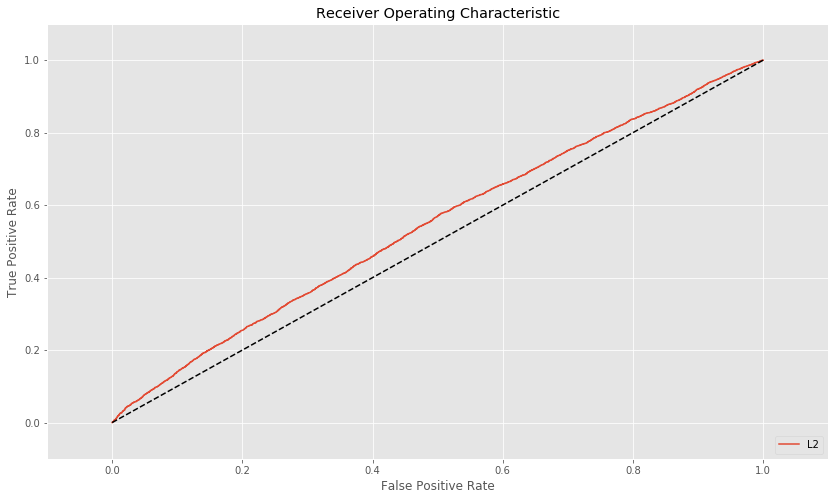

In [60]:
# Initialize figure
fig = plt.figure(figsize=(14,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='L2')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1], 'k--')

# Axes limits and labels
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [61]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_probs)
# Calculate AUROC
print(auc(fpr, tpr))

0.545045226624355


In [62]:
perf_table = pd.read_csv('sector_sym_prcRet.csv')

In [63]:
perf_table.head()

,Date,Sector,Sym,PctRet
0,2014-01-02,FX,AD,0.007056
1,2014-01-02,FX,AD,-0.003168
2,2014-01-03,FX,AD,-0.003936
3,2014-01-07,FX,AD,-0.005184
4,2014-01-10,FX,AD,0.002304


In [64]:
L2_pred = pd.Series(pred)
perf_table['LR_L2_Pred'] = L2_pred
perf_table['ActualRet'] = perf_table['PctRet'] * perf_table['LR_L2_Pred']
perf_table.head()

,Date,Sector,Sym,PctRet,LR_L2_Pred,ActualRet
0,2014-01-02,FX,AD,0.007056,0,0.000000
1,2014-01-02,FX,AD,-0.003168,0,-0.000000
2,2014-01-03,FX,AD,-0.003936,1,-0.003936
3,2014-01-07,FX,AD,-0.005184,0,-0.000000
4,2014-01-10,FX,AD,0.002304,1,0.002304


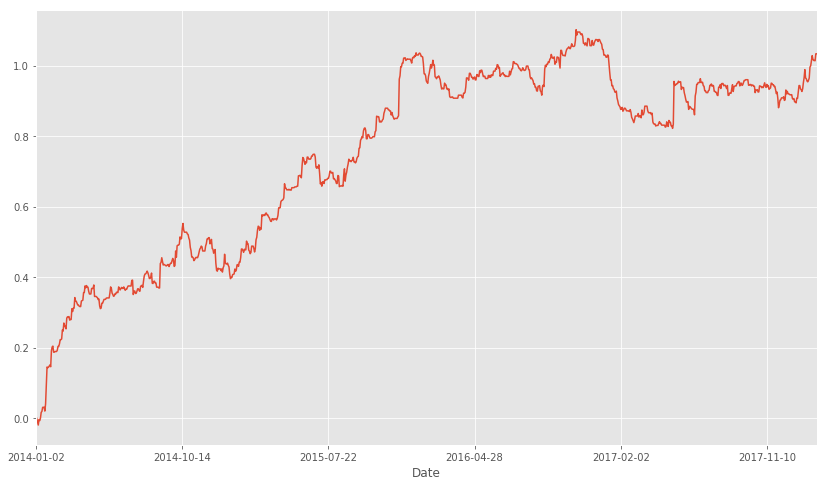

In [71]:
daily_ret = perf_table.groupby('Date')['ActualRet'].sum()
daily_ret.cumsum().plot(figsize=(14,8));

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">
<div style="text-align:center; margin: 40px 0 40px 0;">
[**Back to Contents**](#toc)
</div>

<br id="save model">
## Save model in pickle object
<hr>

In [67]:
# Save winning model as final_model.pkl
with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models_bcox['l2'].best_estimator_, f)

In [68]:
# Load final_model.pkl as model
with open('final_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [69]:
# Display model object
model

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

## Next steps:
1. Optimize classifier threshold for better TPR and a better trading performance 
2. Construct a class that packages together all preprocessing steps from previous modules - MinMax scaling, Box Cox transformation, etc. - that can be used to score unseen data 